In [1]:
# Install necessary libraries
# !pip install requests
# !pip install beautifulsoup4

## Importing Necessary Libraries

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

## Setup:

In [3]:
url = "https://www.cars24.com/buy-used-cars-pune/?listingSource=ViewAllCars&storeCityId=2423"
headers = {
    "User-Agent": "Mozilla/5.0"
}

response = requests.get(url, headers=headers)

In [4]:
if response.status_code == 200:
    print("Successfully fetched the webpage!")
    soup = BeautifulSoup(response.content, "html.parser")
else:
    print(f"Failed to fetch the webpage. Status code: {response.status_code}")

Successfully fetched the webpage!


In [5]:
car_cards = soup.find_all('a', class_='styles_carCardWrapper__sXLIp')

print(f"Found {len(car_cards)} car listings on the page.")

Found 20 car listings on the page.


In [ ]:
all_car_data = []

for card in car_cards:
    try:
        car_name = card.find('span').text.strip()
        car_model = card.find('span', class_='sc-braxZu fccwQo').text.strip()
        specs = card.find_all('p', class_='sc-braxZu kvfdZL')
        kms_driven = specs[0].text.strip()
        fuel_type = specs[1].text.strip()
        transmission = specs[2].text.strip()
        location = card.find('p', class_='sc-braxZu lmmumg').text.strip()
        price = card.find('p', class_='sc-braxZu cyPhJl').text.strip()

        # Store the info in a dictionary
        car_info = {
            "Name": car_name,
            "Model": car_model,
            "Kilometers Driven": kms_driven,
            "Fuel Type": fuel_type,
            "Transmission": transmission,
            "Location": location,
            "Price": price
        }
        all_car_data.append(car_info)

    except Exception as e:
        # The safety net is more important than ever when websites change!
        # This will tell us if a card has a weird layout we didn't expect.
        print(f"Skipping a card. Error: {e}")

In [7]:
print(all_car_data[:2])

[{'Name': '2022 Hyundai Creta', 'Model': 'EX 1.5 DIESEL', 'Kilometers Driven': '38.98k km', 'Fuel Type': 'Diesel', 'Transmission': 'Manual', 'Location': 'Tathawade, Pune', 'Price': '₹12.55 lakh'}, {'Name': '2013 Hyundai Eon', 'Model': 'ERA +', 'Kilometers Driven': '71.38k km', 'Fuel Type': 'Petrol', 'Transmission': 'Manual', 'Location': 'Tathawade, Pune', 'Price': '₹1.92 lakh'}]


In [8]:
df = pd.DataFrame(all_car_data)
df.to_csv('cars24_listings_updated.csv', index=False)

print("\nSuccessfully saved the data to cars24_listings_updated.csv!")



Successfully saved the data to cars24_listings_updated.csv!


## Cleaning the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               20 non-null     object
 1   Model              20 non-null     object
 2   Kilometers Driven  20 non-null     object
 3   Fuel Type          20 non-null     object
 4   Transmission       20 non-null     object
 5   Location           20 non-null     object
 6   Price              20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [10]:
df.head(20)

,Name,Model,Kilometers Driven,Fuel Type,Transmission,Location,Price
0,2022 Hyundai Creta,EX 1.5 DIESEL,38.98k km,Diesel,Manual,"Tathawade, Pune",₹12.55 lakh
1,2013 Hyundai Eon,ERA +,71.38k km,Petrol,Manual,"Tathawade, Pune",₹1.92 lakh
2,2017 Renault Kwid,RXT 0.8,44.96k km,Petrol,Manual,"Tathawade, Pune",₹2.72 lakh
3,2022 Honda City,1.5L I-VTEC VX,12.43k km,Petrol,Manual,"Amanora Mall apex building, Pune",₹11.54 lakh
4,2013 Hyundai i10,SPORTZ 1.2,72.95k km,Petrol,Manual,"Tathawade, Pune",₹2.61 lakh
5,2018 Maruti Baleno,ZETA CVT PETROL 1.2,46.69k km,Petrol,Auto,"Tathawade, Pune",₹5.45 lakh
6,2015 Honda City,1.5L I-VTEC VX CVT,65.08k km,Petrol,Auto,"Tathawade, Pune",₹5.57 lakh
7,2015 Maruti Wagon R Stingray,VXI,72.37k km,CNG,Manual,"Tathawade, Pune",₹3.66 lakh
8,2018 Maruti Ciaz,ALPHA 1.4 PETROL,30.68k km,Petrol,Manual,"Amanora Mall apex building, Pune",₹6.26 lakh
9,2012 Honda City,1.5L I-VTEC V AT,95.71k km,Petrol,Auto,"Tathawade, Pune",₹3.53 lakh


There is no null value in the dataset but we can see symbols in the 'Price' column.

In [11]:
df['Price_Clean'] = df['Price'].str.replace('₹', '').str.replace('lakh', '').str.strip().astype(float) * 100000

'Kilometers Driven' column is needed to be cleaned as well.

In [12]:
def clean_kilometers(km_str):
    km_str = km_str.replace('km', '').strip()
    if 'k' in km_str.lower():
        return int(float(km_str.lower().replace('k', '').strip()) * 1000)
    elif 'l' in km_str.lower():
        return int(float(km_str.lower().replace('l', '').strip()) * 100000) # Assuming 'lakh' as 100,000
    else:
        try:
            return int(float(km_str))
        except ValueError:
            return None # Handle cases that cannot be converted

df['km_driven_clean'] = df['Kilometers Driven'].apply(clean_kilometers)
df.head()


,Name,Model,Kilometers Driven,Fuel Type,Transmission,Location,Price,Price_Clean,km_driven_clean
0,2022 Hyundai Creta,EX 1.5 DIESEL,38.98k km,Diesel,Manual,"Tathawade, Pune",₹12.55 lakh,1255000.0,38980
1,2013 Hyundai Eon,ERA +,71.38k km,Petrol,Manual,"Tathawade, Pune",₹1.92 lakh,192000.0,71380
2,2017 Renault Kwid,RXT 0.8,44.96k km,Petrol,Manual,"Tathawade, Pune",₹2.72 lakh,272000.0,44960
3,2022 Honda City,1.5L I-VTEC VX,12.43k km,Petrol,Manual,"Amanora Mall apex building, Pune",₹11.54 lakh,1154000.0,12430
4,2013 Hyundai i10,SPORTZ 1.2,72.95k km,Petrol,Manual,"Tathawade, Pune",₹2.61 lakh,261000.0,72950


In [13]:
df.drop(columns=['Price', 'Kilometers Driven'], inplace=True)
df.head()

,Name,Model,Fuel Type,Transmission,Location,Price_Clean,km_driven_clean
0,2022 Hyundai Creta,EX 1.5 DIESEL,Diesel,Manual,"Tathawade, Pune",1255000.0,38980
1,2013 Hyundai Eon,ERA +,Petrol,Manual,"Tathawade, Pune",192000.0,71380
2,2017 Renault Kwid,RXT 0.8,Petrol,Manual,"Tathawade, Pune",272000.0,44960
3,2022 Honda City,1.5L I-VTEC VX,Petrol,Manual,"Amanora Mall apex building, Pune",1154000.0,12430
4,2013 Hyundai i10,SPORTZ 1.2,Petrol,Manual,"Tathawade, Pune",261000.0,72950


## Feature Engineering

In [14]:
df['Year']= df['Name'].str.slice(0,4).astype(int)
df['Company']= df['Name'].str.split().str[1]
df.head()

,Name,Model,Fuel Type,Transmission,Location,Price_Clean,km_driven_clean,Year,Company
0,2022 Hyundai Creta,EX 1.5 DIESEL,Diesel,Manual,"Tathawade, Pune",1255000.0,38980,2022,Hyundai
1,2013 Hyundai Eon,ERA +,Petrol,Manual,"Tathawade, Pune",192000.0,71380,2013,Hyundai
2,2017 Renault Kwid,RXT 0.8,Petrol,Manual,"Tathawade, Pune",272000.0,44960,2017,Renault
3,2022 Honda City,1.5L I-VTEC VX,Petrol,Manual,"Amanora Mall apex building, Pune",1154000.0,12430,2022,Honda
4,2013 Hyundai i10,SPORTZ 1.2,Petrol,Manual,"Tathawade, Pune",261000.0,72950,2013,Hyundai


In [15]:
df['Name'] = df['Name'].str[5:].str.strip()
df.rename(columns={'Name': 'Car_Name'}, inplace=True)
df.head()

,Car_Name,Model,Fuel Type,Transmission,Location,Price_Clean,km_driven_clean,Year,Company
0,Hyundai Creta,EX 1.5 DIESEL,Diesel,Manual,"Tathawade, Pune",1255000.0,38980,2022,Hyundai
1,Hyundai Eon,ERA +,Petrol,Manual,"Tathawade, Pune",192000.0,71380,2013,Hyundai
2,Renault Kwid,RXT 0.8,Petrol,Manual,"Tathawade, Pune",272000.0,44960,2017,Renault
3,Honda City,1.5L I-VTEC VX,Petrol,Manual,"Amanora Mall apex building, Pune",1154000.0,12430,2022,Honda
4,Hyundai i10,SPORTZ 1.2,Petrol,Manual,"Tathawade, Pune",261000.0,72950,2013,Hyundai


## Exploratory Data Analysis

In [16]:
average_price = df['Price_Clean'].mean()
cheapest_car_index = df['Price_Clean'].idxmin()
most_expensive_car_index = df['Price_Clean'].idxmax()


cheapest_car_name = df.loc[cheapest_car_index, 'Car_Name']
most_expensive_car_name = df.loc[most_expensive_car_index, 'Car_Name']

print(f"Average Price: ₹{average_price:,.2f}")
print(f"Cheapest Car Name: {cheapest_car_name} (Price: ₹{df.loc[cheapest_car_index, 'Price_Clean']:,.2f})")
print(f"Most Expensive Car Name: {most_expensive_car_name} (Price: ₹{df.loc[most_expensive_car_index, 'Price_Clean']:,.2f})")

Average Price: ₹543,250.00
Cheapest Car Name: Hyundai Eon (Price: ₹192,000.00)
Most Expensive Car Name: Hyundai Creta (Price: ₹1,255,000.00)


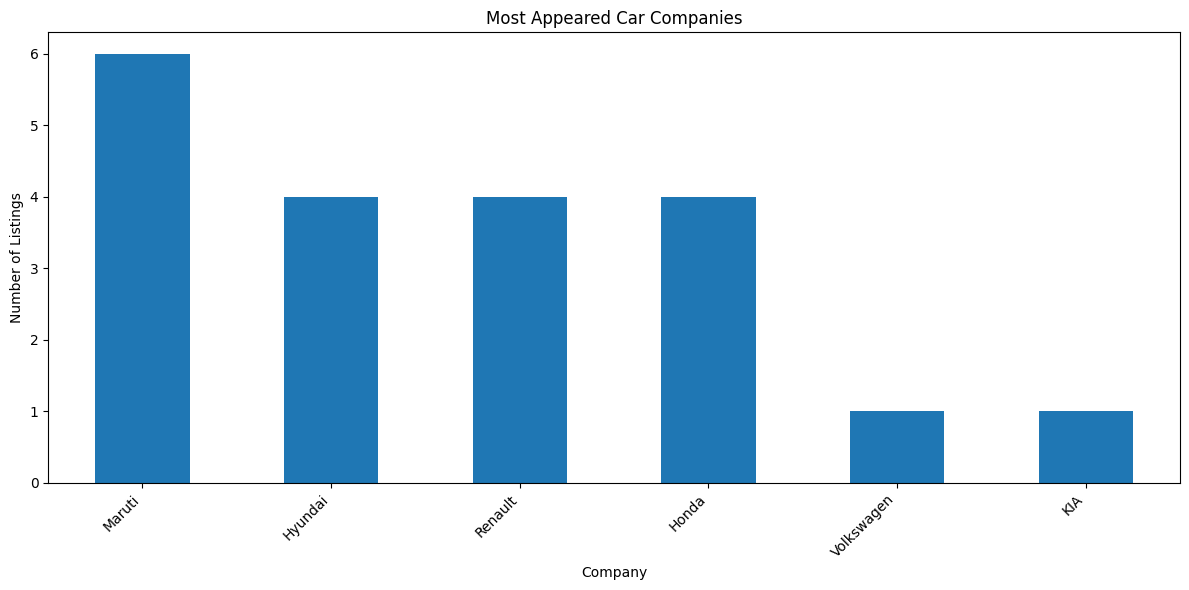

In [17]:
import matplotlib.pyplot as plt
# Analyze the frequency of each company
company_counts = df['Company'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
company_counts.plot(kind='bar')
plt.title('Most Appeared Car Companies')
plt.xlabel('Company')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

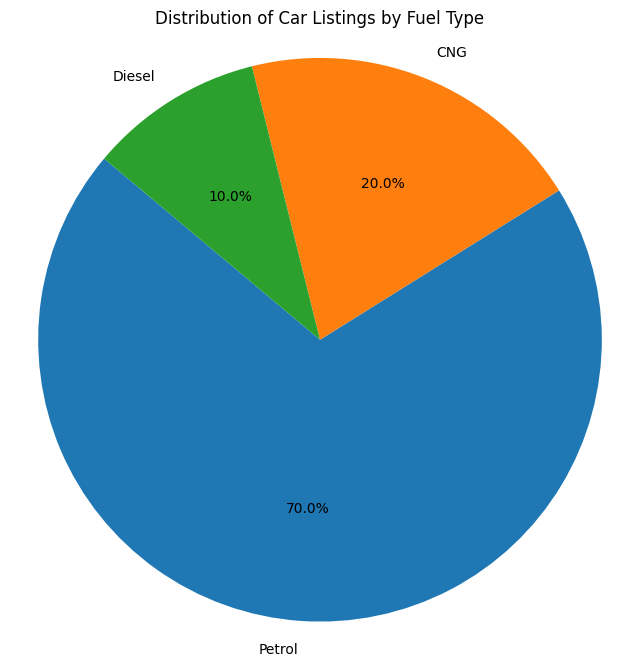

In [18]:
# Analyze the frequency of each fuel type
fuel_type_counts = df['Fuel Type'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Car Listings by Fuel Type')
plt.axis('equal')
plt.show()

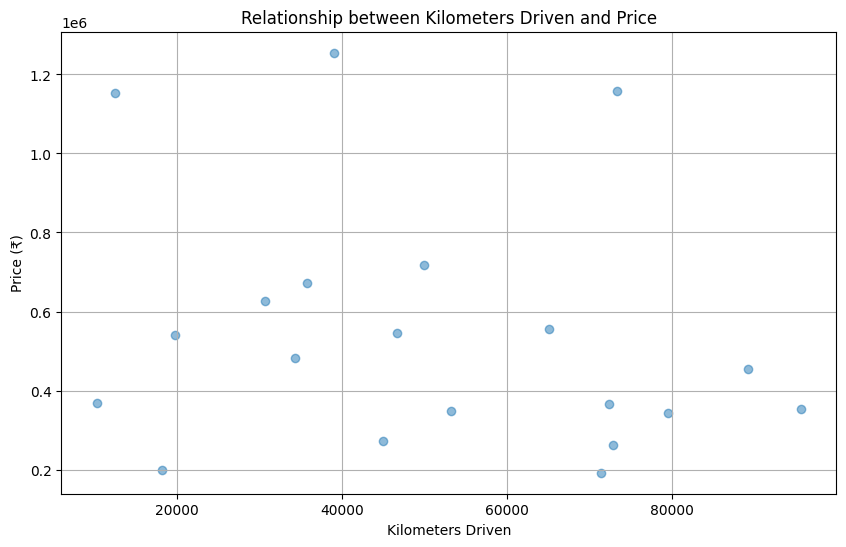


Correlation between Kilometers Driven and Price: -0.23
There is a negative correlation between kilometers driven and price, suggesting that cars with more kilometers driven tend to have a lower price.


In [19]:
# Scatter plot to visualize the relationship between kilometers driven and price
plt.figure(figsize=(10, 6))
plt.scatter(df['km_driven_clean'], df['Price_Clean'], alpha=0.5)
plt.title('Relationship between Kilometers Driven and Price')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price (₹)')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation = df['km_driven_clean'].corr(df['Price_Clean'])
print(f"\nCorrelation between Kilometers Driven and Price: {correlation:.2f}")

# Interpretation
if correlation < 0:
    print("There is a negative correlation between kilometers driven and price, suggesting that cars with more kilometers driven tend to have a lower price.")
elif correlation > 0:
    print("There is a positive correlation between kilometers driven and price, suggesting that cars with more kilometers driven tend to have a higher price.")
else:
    print("There is no significant correlation between kilometers driven and price.")

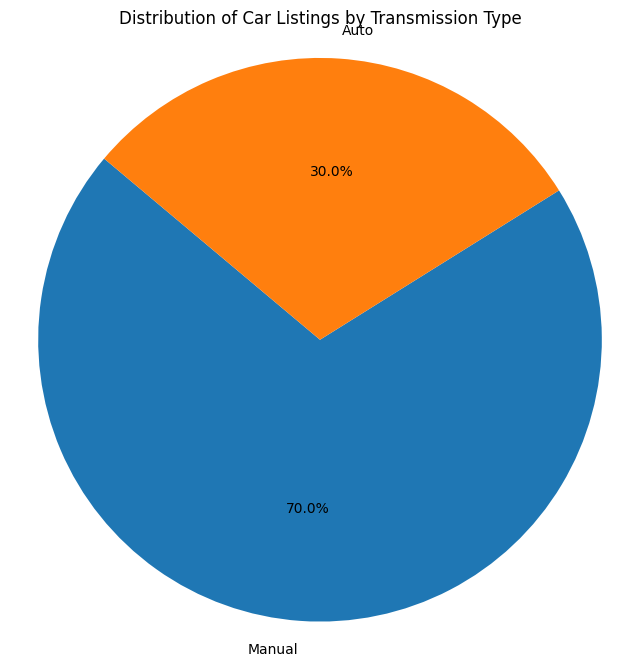

In [20]:
# Analyze the frequency of each transmission type
transmission_counts = df['Transmission'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Car Listings by Transmission Type')
plt.axis('equal')
plt.show()


Average Price by Transmission Type:
Transmission
Auto      645333.333333
Manual    499500.000000
Name: Price_Clean, dtype: float64

Based on the scraped data:
Automatic cars appear to be more expensive on average than manual cars in this dataset of used cars.


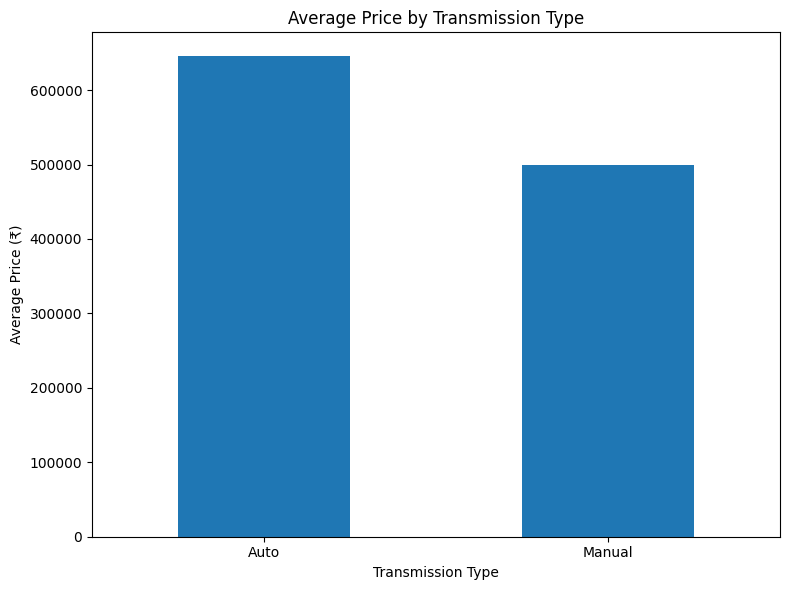

In [21]:
# Calculate the average price for each transmission type
average_price_by_transmission = df.groupby('Transmission')['Price_Clean'].mean().sort_values(ascending=False)

print("\nAverage Price by Transmission Type:")
print(average_price_by_transmission)

# Conclusion based on the data
print("\nBased on the scraped data:")
if average_price_by_transmission.get('Auto', 0) > average_price_by_transmission.get('Manual', 0):
    print("Automatic cars appear to be more expensive on average than manual cars in this dataset of used cars.")
elif average_price_by_transmission.get('Auto', 0) < average_price_by_transmission.get('Manual', 0):
    print("Manual cars appear to be more expensive on average than automatic cars in this dataset of used cars.")
else:
    print("The average price between automatic and manual cars is similar in this dataset of used cars.")

# Optional: Plot a bar chart for average price by transmission
plt.figure(figsize=(8, 6))
average_price_by_transmission.plot(kind='bar')
plt.title('Average Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Average Price (₹)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [22]:
min_price = df['Price_Clean'].min()
max_price = df['Price_Clean'].max()

print(f"Price Range:")
print(f"Minimum Price: ₹{min_price:,.2f}")
print(f"Maximum Price: ₹{max_price:,.2f}")

Price Range:
Minimum Price: ₹192,000.00
Maximum Price: ₹1,255,000.00
